# 1. 부분 회귀
$x_1$이라는 독립 변수만으로 회귀분석한 결과
$$ y = w_1x_1 + e $$
에 새로운 독립 변수 $x_2$를 추가한 회귀분석
$$ y = w_1'x_1 + w_2'x_2 + e' $$
의 $w_1'$과 원래의 $w_1$ 값은 다르다.  
즉 종속 변수에 영향을 미치는 모든 독립 변수를 회귀모형에 포함하지 않는 한 모형의 가중치는 항상 편향된(biased) 값이 나온다.
> **증명**  
* 독립 변수 $x_1$만으로 이루어진 특징 행렬을 $X_1$, 독립 변수 $x_2$만으로 이루어진 특징 행렬을 $X_2$라 했을 때
$$ X = \begin{bmatrix} X_1& X_2 \end{bmatrix} $$
* 독립 변수 $x_1$만으로 회귀분석 한 가중치 벡터는
$$ w_1 = (X_1^TX_1)^{-1}X_1^Ty $$
* 독립 변수 $x_2$를 추가한 선형 회귀 모형은
$$ y = \hat y + e' = \begin{bmatrix} X_1& X_2 \end{bmatrix}\begin{bmatrix} w_1'\\ w_2' \end{bmatrix} + e' $$
    * $w_1', w_2'$ : 새로운 모형의 가중치 벡터
    * $e'$ : 새로운 모형의 잔차 벡터
* 양변에 $X$를 곱하여 직교 방정식을 구하면
$$ \begin{bmatrix} X_1^TX_1& X_1^TX_2\\ X_2^TX_1& X_2^TX_2 \end{bmatrix}\begin{bmatrix} w_1'\\ w_2' \end{bmatrix} = \begin{bmatrix} X_1^Ty\\ X_1^Ty \end{bmatrix} $$
* 부분행렬의 역행렬 공식을 사용하여 이 방정식을 풀면
$$ w_1' = (X_1^TX_1)^{-1}X_1^T(y - X_2w_2') $$
$$ = (X_1^TX_1)^{-1}X_1^Ty - (X_1^TX_1)^{-1}X_1^TX_2w_2' $$
* 따라서 새로운 독립 변수를 추가해서 다시 회귀분석을 하면 기존 회귀분석으로 구했던 가중치 벡터의 값은 달라진다.

단 다음의 경우에는 두 회귀분석 결과가 같아진다.
1. $w_2' = 0$.  
즉 $X_2$와 $y$의 상관관계가 없는 경우
2. $X_1^TX_2 = 0$.  
즉 독립 변수 $x_1$과 독립 변수 $x_2$의 상관관계가 없는 경우

# 2. Frisch-Waugh-Lovell 정리 (FWL 정리)
* FWL 정리는 위 결과를 변형한 것이다.
> 특정한 독립 변수 $x_1$로 나머지 독립 변수 $x_2$를 선형 회귀분석하여 나온 잔차 $x_2^*$를 독립 변수로 하고,   
$x_1$로 종속 변수 $y$를 선형 회귀분석하여 나온 잔차 $y^*$를 종속 변수로 하여 다시 선형 회귀분석하여 구한 가중치는  
$x_1, x_2$를 모두 사용하여 $y$를 선형 회귀분석하였을 때 $x_2$에 대한 가중치와 같다.

> **증명**  
* 2개의 독립 변수 $x_1, x_2$가 있을 때, $x_1$에 대한 가중치 벡터 $w_1$ 구하기
$$ y = \begin{bmatrix} X_1& X_2 \end{bmatrix}\begin{bmatrix} w_1\\ w_2 \end{bmatrix} + e $$
    * 직교 방정식은
$$ \begin{bmatrix} X_1^TX_1& X_1^TX_2\\ X_2^TX_1& X_2^TX_2 \end{bmatrix}\begin{bmatrix} w_1\\ w_2 \end{bmatrix} = \begin{bmatrix} X_1^Ty\\ X_1^Ty \end{bmatrix} $$
    * 이 식의 아랫 부분만 쓰면
$$ X_2^TX_1w_1 + X_2^TX_2w_2 = X_2^Ty $$
    * 여기에 앞에서 구한 $w_1$ 값을 대입하면 (직교방정식의 윗식에서 나온 $w_1$)
$$ w_1 = (X_1^TX_1)^{-1}X_1^Ty - (X_1^TX_1)^{-1}X_1^TX_2w_2 $$
* 이 식을 정리하면 (아랫 부분 식에 $w_1$ 대입)
$$ X_2^TX_1(X_1^TX_1)^{-1}X_1^Ty - X_2^TX_1(X_1^TX_1)^{-1}X_1^TX_2w_2 + X_2^TX_2w_2 = X_2^Ty $$
$$ X_2^T(I - X_1(X_1^TX_1)^{-1}X_1^T)X_2w_2 = X_2^T(I - X_1(X_1^TX_1)^{-1}X_1^T)y $$
* $x_1$으로 선형 회귀분석하였을 때의 잔차 행렬 $M_1$을 적용하면
$$ X_2^T(M_1X_2)w_2 = X_2^T(M_1y) $$
* 잔차 행렬의 성질을 이용하면
$$ (M_1X_2)^T(M_1X_2)w_2 = (M_1X_2)^T(M_1y) $$
    * $M_1X_2$ : $x_2$를 $x_1$으로 회귀분석한 잔차 벡터
    * $M_1y$ : $y$를 $x_1$으로 회귀분석한 잔차 벡터
* 따라서 $x_2^*$를 독립 변수, $y^*$를 종속 변수로 선형 회귀분석한 결과와 같아진다.
$$ X_2^{*T}X_2^*w_2 = X_2^{*T}y^* $$

# 2. 평균 제거 데이터
상수항이 결합된 독립 변수 행렬에서, 상수항만 사용하여 회귀분석을 하면 평균을 제거하는 것과 같아진다.  
따라서 FWL 정리를 적용하면 다음과 같은 결과를 얻을 수 있다.
> 독립 변수에서 평균을 제거한 데이터와 종속 변수에서 평균을 제거한 데이터로 얻은 회귀분석 결과는 상수항을 포함하여 구한 회귀분석 결과와 같다.

**주의!**  
평균을 제거한 데이터를 사용하는 경우에는 독립 변수에 상수항을 포함하지 않는다.

# 3. 부분 회귀 플롯
* 부분 회귀 플롯(Partial Regression Plot) : 독립 변수의 갯수가 많을 경우에 특정한 하나의 독립 변수의 영향력을 시각화하는 방법
* Added Variable Plot이라고도 한다.
* 부분 회귀 플롯을 그리기 위해서는 3번의 선형 회귀분석을 해야한다.
    1. 특정한 독립 변수 $z$를 제외한 나머지 독립 변수 $x$들로 종속 변수 $y$를 선형 회귀분석하여 잔차 $y^*$를 구한다.
    2. 특정한 독립 변수 $z$를 제외한 나머지 독립 변수 $x$들로 특정한 독립 변수 $z$를 선형 회귀분석하여 잔차 $z^*$를 구한다.
    3. 잔차 $z^*$를 독립 변수로, 잔차 $y^*$를 종속 변수로 하여 선형 회귀분석 한다. 
    
  이렇게 구한 $z^*, y^*$의 산점도와 회귀분석 결과를 나타낸 것이 **부분 회귀 플롯**이다.
  
#### boston 데이터로 부분 회귀 플롯 그리기

In [3]:
import statsmodels.api as sm
import pandas as pd
from sklearn.datasets import load_boston

boston = load_boston()
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)

model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()

##### sm.graphics.plot_partregress
부분 회귀 플롯을 그린다.  
이 때 다른 변수의 이름을 모두 지정해 주어야 한다.
* 인수  
    * `ret_coords=True` : 잔차 데이터를 반환한다.  
http://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.plot_partregress.html

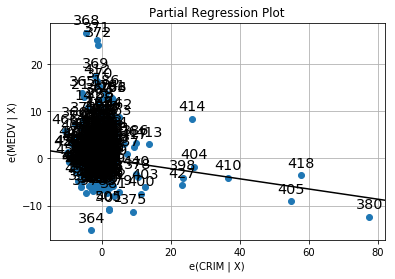

In [7]:
import matplotlib.pyplot as plt

others = list(set(df.columns).difference(set(["MEDV", "CRIM"])))
p, resids = sm.graphics.plot_partregress("MEDV", "CRIM", others, data=df, 
                                         ret_coords=True)
plt.grid()
plt.show()

부분 회귀 플롯에서 가로축의 값은 독립 변수 자체의 값이 아니라  
어떤 독립 변수에서 다른 독립 변수의 영향을 제거한 일종의 "순수한 독립 변수 성분"

##### sm.graphics.plot_partregress_grid
전체 데이터에 대해 한 번에 부분 회귀 플롯을 그린다.

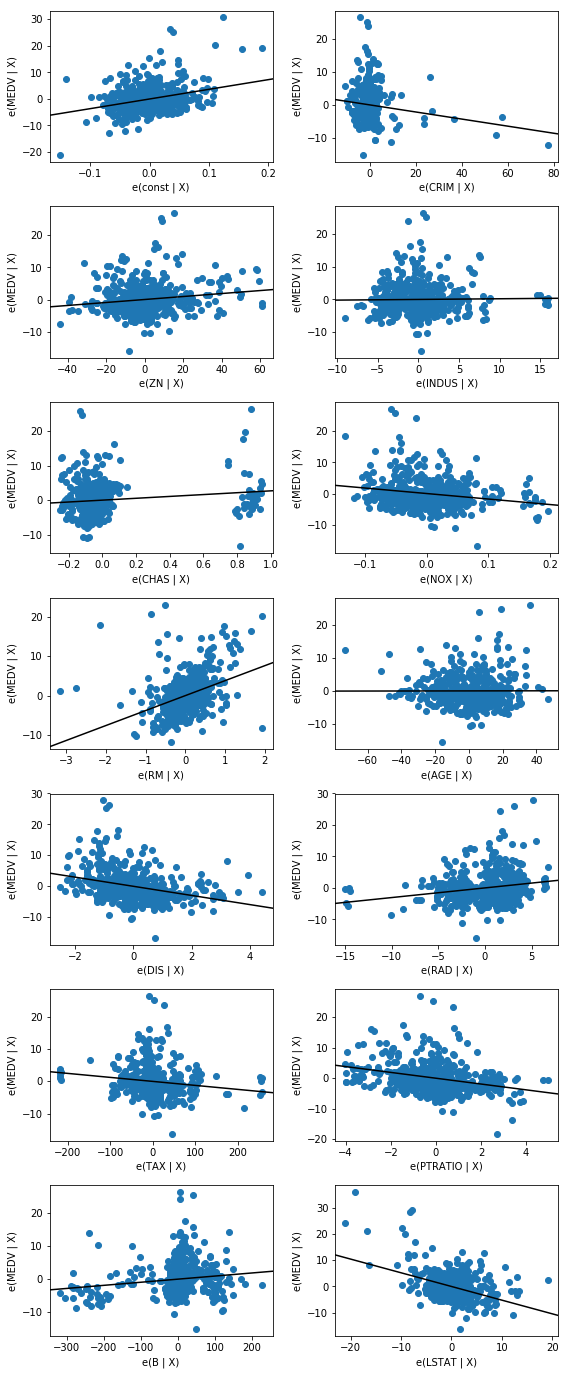

In [12]:
fig = plt.figure(figsize=(8, 20))
sm.graphics.plot_partregress_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

# 4. CCPR 플롯
* CCPR(Component-Component plus Residual) 플롯 : 부분 회귀 플롯과 마찬가지로 특정한 하나의 변수의 영향을 살펴보기 위해 그리는 플롯
* 아래 회귀 모형을 가정할 때
$$ y = \hat y + e = w_1x_1 + w_2x_2 + ... + w_ix_i + ... + w_Kx_K + e $$
CCPR 플롯은 이 성분 중에서
$$ x_i \text{ } vs \text{ } w_ix_i + e $$
를 스캐터 플롯으로 그린 것이다.
* CCPR 플롯에서는 독립 변수가 원래의 값 그대로 나타난다.

##### sm.graphics.plot_ccpr
CCPR 플롯을 그린다.

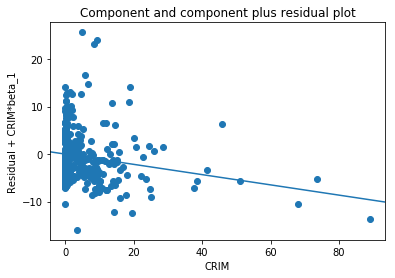

In [13]:
sm.graphics.plot_ccpr(result_boston, "CRIM")
plt.show()

##### sm.graphics.plot_ccpr_grid
전체 데이터에 대해 한 번에 CCPR 플롯을 그린다.

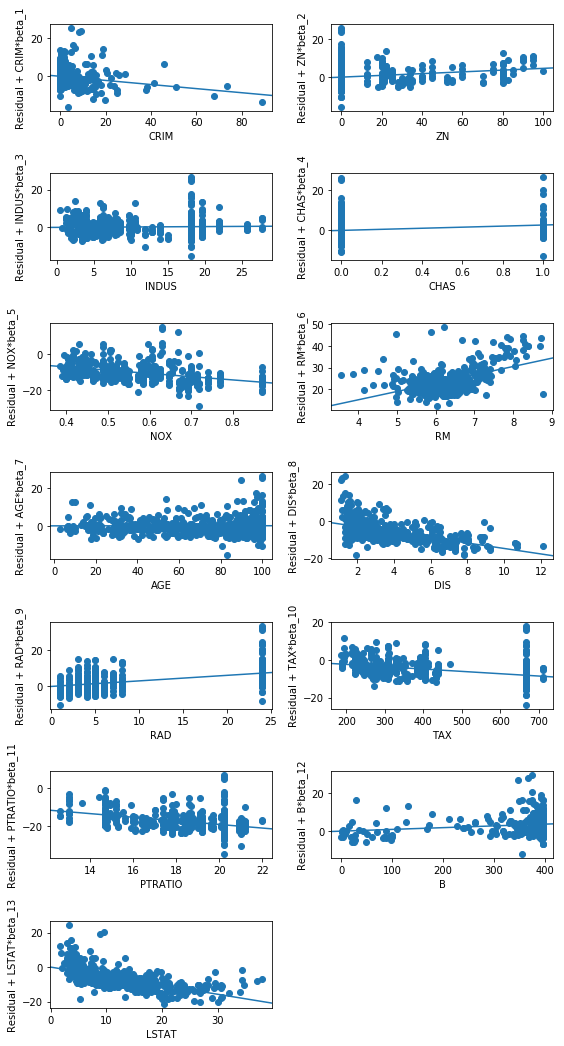

In [15]:
fig = plt.figure(figsize=(8, 15))
sm.graphics.plot_ccpr_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

##### sm.plot_regress_exog
부분 회귀 플롯과 CCPR을 같이 보여준다.

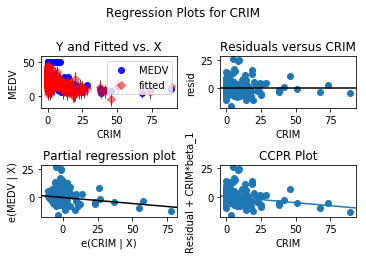

In [14]:
fig = sm.graphics.plot_regress_exog(result_boston, "CRIM")
plt.tight_layout(pad=4, h_pad=0.5, w_pad=0.5)
plt.show()